1. 利用神经网络来预测天气对餐馆销量的影响

2. 利用SVM或神经网络算法对Iris（鸢尾属植物）进行分类。数据文件位置../data/iris.csv

3. 利用决策树对员工满意度调查报告进行分析。数据文件位置../data/labor.csv

4. 请回答准确率、召回率、F1、AUC这些指标的意义。

# 利用神经网络来预测天气对餐馆销量的影响

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = '../data_analysis_tutorial/data/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [3]:
data[data == '高'] = 1
data[data == '是'] = 1
data[data == '好'] = 1
data[data != 1] = 0
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,1
5,0,1,1,1


In [4]:
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
clf = MultinomialNB()
clf.fit(x, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print(accuracy_score(y,clf.predict(x)))
print(f1_score(y,clf.predict(x)))
print(recall_score(y,clf.predict(x)))

0.5588235294117647
0.6341463414634146
0.7222222222222222


# 利用SVM或神经网络算法对Iris（鸢尾属植物）进行分类。数据文件位置../data/iris.csv

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

/home/twer/.local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


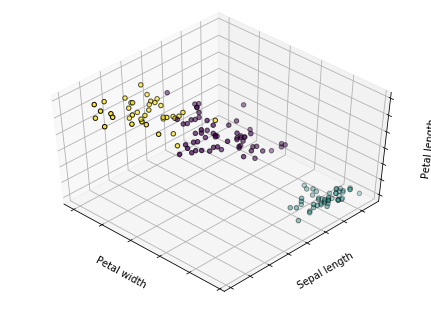

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

fig.show()

# 利用决策树对员工满意度调查报告进行分析。数据文件位置../data/labor.csv

In [8]:
labor = pd.read_csv('../data_analysis_tutorial/data/labor.csv')
labor.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,'average',?,?,'yes',?,'good'
1,2,4.5,5.8,?,?,35,'ret_allw',?,?,'yes',11,'below_average',?,'full',?,'full','good'
2,?,?,?,?,?,38,'empl_contr',?,5,?,11,'generous','yes','half','yes','half','good'
3,3,3.7,4,5,'tc',?,?,?,?,'yes',?,?,?,?,'yes',?,'good'
4,3,4.5,4.5,5,?,40,?,?,?,?,12,'average',?,'half','yes','half','good'
